In [ ]:
from data import get_files, get_content


In [ ]:
from args import get_args
args = get_args(null_args=True)
print(args)

In [ ]:
samples = get_files(args.data_dir, viewset=args.viewset, viewlen=args.viewlen)
 

In [ ]:
print(samples)

In [18]:
print(samples[0][4])

['G:\\program\\github\\gaitRec\\data\\gait_prime_joints\\001-cl-02-090', 73]


In [ ]:

tensor = get_content(samples[0][4][0], clip_len=100)

In [ ]:
print(tensor.shape)
tensor = tensor.permute(1,2,0,3).squeeze()

In [ ]:
print(tensor.shape)
print(tensor[:,1,:])

In [13]:
tensor3 = tensor[:,1,:]
tensor4 = tensor[:, 10, :]
tensor5 = tensor[:, 13, :]

In [21]:
tensorp = np.concatenate([tensor[1:], tensor[-2:-1]], axis = 0)
tensorn = np.concatenate([tensor[1:2], tensor[:-1]], axis = 0)

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])


In [15]:
print(tensor4.shape)

torch.Size([100, 3])


In [ ]:
tensor2 = tensor - tensor[:,1:2,:]
print(tensor2[:,10,:])

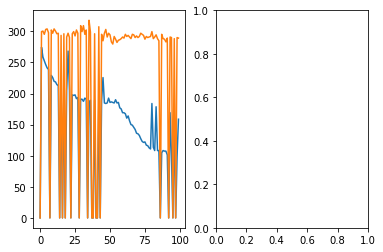

In [19]:
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2)

t = np.arange(100)
s1 = tensor5[:,0]
s2 = tensor5[:,1]
axs[0].plot(t, s1, t, s2)
# axs[1].cohere(s1, s2, 6, 25)

In [ ]:
def contiguous_regions(condition):
    """Finds contiguous True regions of the boolean array "condition". Returns
    a 2D array where the first column is the start index of the region and the
    second column is the end index."""

    # Find the indicies of changes in "condition"
    d = np.diff(condition)
    idx, = d.nonzero() 

    # We need to start things after the change in "condition". Therefore, 
    # we'll shift the index by 1 to the right.
    idx += 1

    if condition[0]:
        # If the start of condition is True prepend a 0
        idx = np.r_[0, idx]

    if condition[-1]:
        # If the end of condition is True, append the length of the array
        idx = np.r_[idx, condition.size] # Edit

    # Reshape the result into two columns
    idx.shape = (-1,2)
    return idx

def find_region(condition):
    max_length = 0 
    return_s = 0
    return_e = 0
    for start, stop in contiguous_regions(condition):
        t = stop - start
        if max_length < t:
            return_s = start
            return_e = stop
            max_length = t
    return return_s, return_e



In [ ]:
img_r = "dvs/pic/7/3/3_3/2.png"
import cv2
img = cv2.imread(img_r)
print(img.shape)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5,5), 1)
gray = cv2.fastNlMeansDenoising(gray,h = 10, templateWindowSize = 7)
cv2.imwrite("a.png", gray)


sm = gray.sum(0)
condition = sm > min(sm)
s,e = find_region(condition)
l = e - s
s = max(0, s - l // 4)
e = min(gray.shape[1] - 1, e + l // 4)
img = img[:, s:e]

sm = gray.sum(1)
condition = sm > min(sm)
s,e = find_region(condition)
l = e - s
s = max(0, s - l // 4)
e = min(gray.shape[0] - 1, e + l // 4)
img = img[s:e, :]
cv2.imwrite("r.png", img)




import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1,2)

t = np.arange(len(sm))
axs[0].plot(t, sm)
